In [1]:
import scipy.io
import numpy as np
from scipy.sparse import csr_array
import matplotlib.pyplot as plt 
import struct

The Dirac matrix is defined by the following equation
\begin{align*}
    D(\vec{n},\vec{m})&=\left(m+\frac{4}{a} \right)I_{12}\delta_{\vec{n},\vec{m}}  
    - \frac{1}{2a} \sum_{\mu=1}^4 \left[ (I_4-\gamma_\mu)\otimes U_\mu(\vec{n}) \delta_{\vec{n}+\hat{\mu}, \vec{m}}+ (I_4-\gamma_\mu)\otimes U_\mu^\dagger(\vec{n}-\hat{\mu})\delta_{\vec{n}-\hat{\mu},\vec{m}}\right],
\end{align*}where $\gamma_\mu\in\mathbb{C}^{4\times4};\, U_\mu\in\textrm{SU(3)};\, \mu=1,2,3,4; \, m,a\in\mathbb{R}$

$\vec{n},\vec{m}\in V=\lbrace \vec{n}=(n_1,n_2,n_3,n_4)| n_\mu=0,1,\dots,N_\mu-1; \mu=1,2,3,4 \rbrace; \delta_{\vec{n},\vec{m}}=\begin{cases}1 & \quad \textrm{if }\vec{n}=\vec{m}, \\ 0 & \quad \textrm{otherwise}\end{cases}$ 

and $\hat{\mu}$ is a unit vector in the direction indexed by $\mu$

The Dirac matrix has $(12 N_t N_x N_y N_z)^2$ complex random entries.

In [3]:
Ns, Nt = 4, 4 #Nx = Ny = Nz = Ns
N = 12*Ns**3*Nt
print("4D Lattice of dimensions Nx={0}, Ny={0}, Nz={0}, Nt={1}".format(Ns,Nt))
print("Number of variables: {0}".format(N))
file_name = 'wilson_Ns_{0}_Nt_{1}_mq_98.mat'.format(Ns,Nt) #.mat file with matrix info
mat = scipy.io.loadmat(file_name) 
print(mat.items())

4D Lattice of dimensions Nx=4, Ny=4, Nz=4, Nt=4
Number of variables: 3072
dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 29 07:26:37 2024'), ('__version__', '1.0'), ('__globals__', []), ('A', <3072x3072 sparse matrix of type '<class 'numpy.complex128'>'
	with 150528 stored elements in Compressed Sparse Column format>)])


In [4]:
DiracM = mat['A'] #Dirac Matrix
row, column = csr_array(DiracM).nonzero() #Non-zero entries coordinates
NonZero = len(row)
print("Number of non-zero entries: {0}".format(NonZero))
print("Sparsity: {0}".format(NonZero/N**2))

Number of non-zero entries: 150528
Sparsity: 0.015950520833333332


In [5]:
#This allows us to identify the matrix rows or columns with the space-time and color coordinates (x,y,z,t,c,s)
Indices = {'x':[],'y':[],'z':[],'t':[],'c':[],'s':[]}
C, S = 3, 4 #Color (related to the dimension of U_mu) and S (related to the dimension of gamma)
for x in range(Ns):
    for y in range(Ns):
        for z in range(Ns):
            for t in range(Nt):
                for c in range(C):
                    for s in range(S):
                        #print(x*Ns*Ns*Nt*C*S + y*Ns*Nt*C*S + z*Nt*C*S + t*C*S + c*S + s) Coordinates vectorization
                        Indices['x'].append(x)
                        Indices['y'].append(y)
                        Indices['z'].append(z)
                        Indices['t'].append(t)
                        Indices['c'].append(c)
                        Indices['s'].append(s)

In [6]:
#Print the first m non-zero entries
m = 1000
for i in range(m): 
    print("Row indices x={0}, y={1}, z={2}, t={3}, c={4}, s={5}".format(Indices['x'][row[i]],Indices['y'][row[i]],
                                          Indices['z'][row[i]],Indices['t'][row[i]],
                                          Indices['c'][row[i]],Indices['s'][row[i]]))
    print("Column indices x={0}, y={1}, z={2}, t={3}, c={4}, s={5}".format(Indices['x'][column[i]],Indices['y'][column[i]],
                                          Indices['z'][column[i]],Indices['t'][column[i]],
                                          Indices['c'][column[i]],Indices['s'][column[i]]))
    print("D({0},{1})={2}".format(row[i],column[i],DiracM[row[i],column[i]]))
    print("--------------------------------------------------------------")

Row indices x=0, y=0, z=0, t=0, c=0, s=0
Column indices x=0, y=0, z=0, t=0, c=0, s=0
D(0,0)=(3.02+0j)
--------------------------------------------------------------
Row indices x=0, y=0, z=0, t=0, c=0, s=0
Column indices x=0, y=0, z=0, t=1, c=0, s=0
D(0,12)=(0.2881680936470933+0.11808085419811731j)
--------------------------------------------------------------
Row indices x=0, y=0, z=0, t=0, c=0, s=0
Column indices x=0, y=0, z=0, t=1, c=0, s=3
D(0,15)=(-0.11808085419811731+0.2881680936470933j)
--------------------------------------------------------------
Row indices x=0, y=0, z=0, t=0, c=0, s=0
Column indices x=0, y=0, z=0, t=1, c=1, s=0
D(0,16)=(0.3362196862150475-0.015244605472919628j)
--------------------------------------------------------------
Row indices x=0, y=0, z=0, t=0, c=0, s=0
Column indices x=0, y=0, z=0, t=1, c=1, s=3
D(0,19)=(0.015244605472919628+0.3362196862150475j)
--------------------------------------------------------------
Row indices x=0, y=0, z=0, t=0, c=0, s=0

In [7]:
#Creating a binary file with the non-zero entries of the Dirac Matrix
file_path = file_name.replace("mat","bin")
with open(file_path, "wb") as file:
    for i in range(NonZero):
        binary_data = struct.pack("i", row[i]) + struct.pack("i", column[i]) \
        + struct.pack("d", DiracM[row[i],column[i]].real) + struct.pack("d", DiracM[row[i],column[i]].imag)
        file.write(binary_data)

In [8]:
#This dumps data on a .txt file, but the file size is bigger (~300 Mb)
#import os
#name_of_file = file_name.replace("mat","txt")
#completeName = os.path.join('', name_of_file)       
#file = open(completeName, "w") 
#for i in range(NonZero):
#    toFile = '%-10d%-10d%-20.15f%-20.15f\n' %  (row[i], column[i], DiracM[row[i],column[i]].real, DiracM[row[i],column[i]].imag) 
#    if i == NonZero-1:
#        toFile.replace("\n","")
#    file.write(toFile)
#file.close()

In [9]:
def VectorizeCoord(x,y,z,t,c,s):
    """
    Converts the space-time and color coordinates to a vector
    """
    return x*Ns*Ns*Nt*C*S + y*Ns*Nt*C*S + z*Nt*C*S + t*C*S + c*S + s
x=2
y=4
z=1
t=0
c=2
s=2
print(VectorizeCoord(x,y,z,t,c,s))

2362


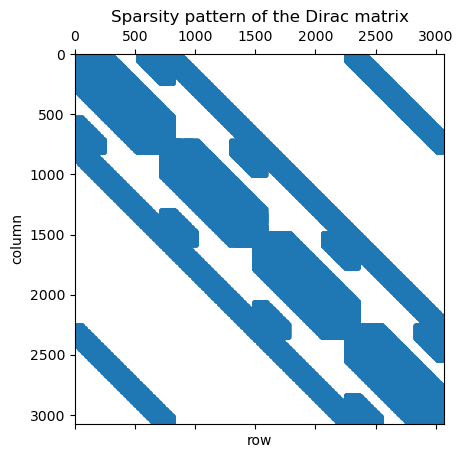

In [10]:
#Sparsity pattern. This could take a couple of seconds 
fig = plt.figure()
plt.spy(DiracM)
plt.title("Sparsity pattern of the Dirac matrix")
plt.xlabel("row")
plt.ylabel("column")
plt.show()